In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNS
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier

### DETECTING PARKINSON DISEASE

#### STEP 1 : GETTING DATASET

In [2]:
data=pd.read_csv('C:/Users/mural/juypter/Parkinsson disease.csv')

In [4]:
data.head(10)

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
5,phon_R01_S01_6,120.552,131.162,113.787,0.00968,0.00008,0.00463,0.00750,0.01388,0.04701,...,0.06985,0.01222,21.378,1,0.415564,0.825069,-4.242867,0.299111,2.187560,0.357775
6,phon_R01_S02_1,120.267,137.244,114.820,0.00333,0.00003,0.00155,0.00202,0.00466,0.01608,...,0.02337,0.00607,24.886,1,0.596040,0.764112,-5.634322,0.257682,1.854785,0.211756
7,phon_R01_S02_2,107.332,113.840,104.315,0.00290,0.00003,0.00144,0.00182,0.00431,0.01567,...,0.02487,0.00344,26.892,1,0.637420,0.763262,-6.167603,0.183721,2.064693,0.163755
8,phon_R01_S02_3,95.730,132.068,91.754,0.00551,0.00006,0.00293,0.00332,0.00880,0.02093,...,0.03218,0.01070,21.812,1,0.615551,0.773587,-5.498678,0.327769,2.322511,0.231571
9,phon_R01_S02_4,95.056,120.103,91.226,0.00532,0.00006,0.00268,0.00332,0.00803,0.02838,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362


### CORRELATION

In [5]:
data = data.drop(['name'], axis=1)
data_corr = data.corr()

In [5]:
data_corr.head(23)

NameError: name 'data_corr' is not defined

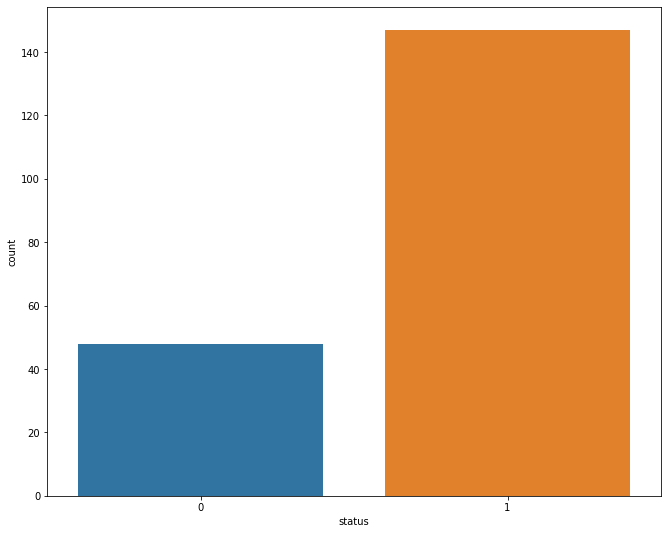

In [6]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.countplot(data['status'])
#plt.xlim(10)

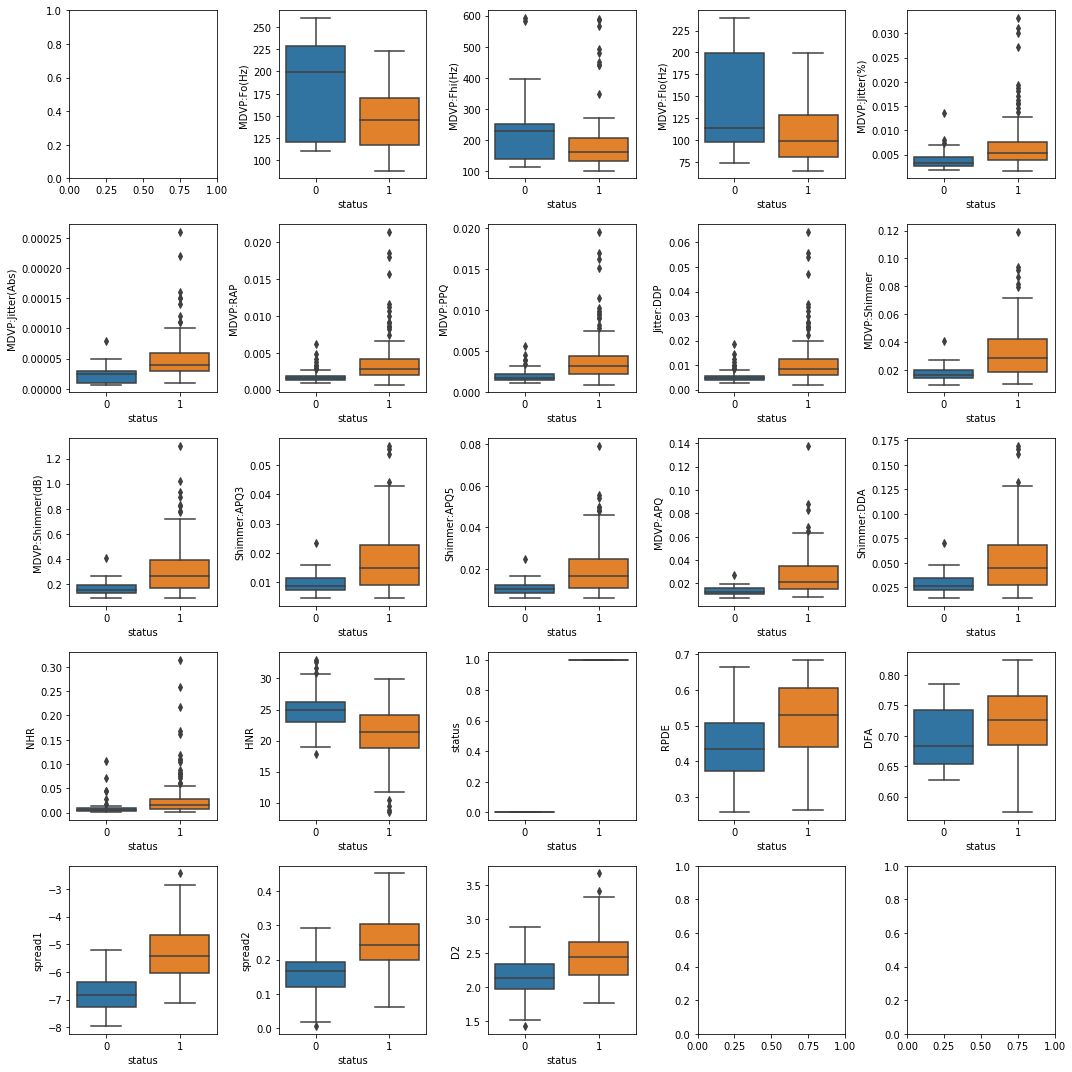

In [7]:
fig,axes=plt.subplots(5,5,figsize=(15,15))
axes=axes.flatten()

for i in range(1,len(data.columns)-1):
    sns.boxplot(x='status',y=data.iloc[:,i],data=data,orient='v',ax=axes[i])
plt.tight_layout()
plt.show()


From the boxplot shown above it is very evident that if a patient has a lower rate of 'HNR','MDVP:Flo(Hz)','MDVP:Fhi(Hz)','MDVP:Fo(Hz)' ,then he/she is affected by parkinsons disease.

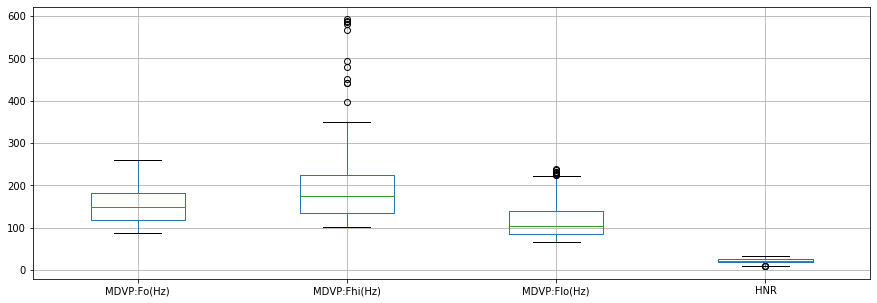

In [8]:
fig, ax = plt.subplots(figsize=(15,5))
data.boxplot(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)','HNR'],ax=ax)

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [10]:
X = data.drop("status",axis=1)
y = data["status"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=9)
print(X_train.shape)
print(X_test.shape)

(136, 23)
(59, 23)


### KNN ACCURACY

In [11]:
test_score ,train_score=[],[]
k_value =[]
for i in range(1,15):
  knn = KNS(i)
  knn.fit(X_train,y_train)
  train_score.append(knn.score(X_train,y_train)) 
  test_score.append(knn.score(X_test,y_test))
  k_value.append(i)
print('Accuracy=',round(max(test_score)*100,3),'% for K=',k_value[(test_score.index(max(test_score)))])


ValueError: could not convert string to float: 'phon_R01_S16_2'

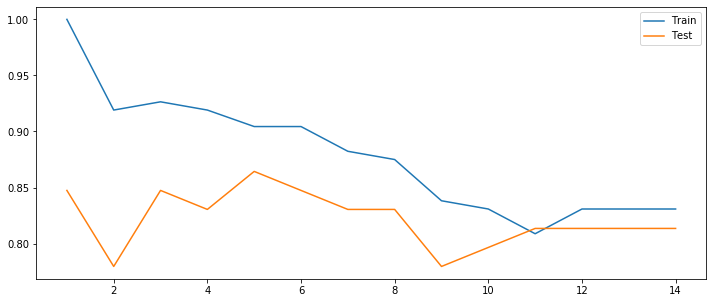

In [13]:
plt.figure(figsize=(12,5))
p=sns.lineplot(range(1,15),train_score , markers='*',label ='Train')
p =sns.lineplot(range(1,15),test_score, markers='o',label = 'Test')

In [14]:
knn = KNS(5)

In [15]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [16]:
prediction=knn.predict(X_test)

In [17]:
prediction 

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [49]:

print(cfr(y_test,prediction))

              precision    recall  f1-score   support

           0       0.78      0.54      0.64        13
           1       0.88      0.96      0.92        46

    accuracy                           0.86        59
   macro avg       0.83      0.75      0.78        59
weighted avg       0.86      0.86      0.85        59



### RANDOM FOREST CLASSIFIER

In [18]:
rfc = RandomForestClassifier(n_estimators=100,max_depth=15)

In [19]:
rfc = RandomForestClassifier(n_estimators=100, criterion='gini',random_state=None)
rfc.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
rfc.score(X_train,y_train)

1.0

In [21]:
preds_rfc = rfc.predict(X_test)

In [22]:
metrics.accuracy_score(y_test,preds_rfc)

0.9322033898305084

In [23]:
z=0
b=0
for i in np.arange(10,150):
    rfc = RandomForestClassifier(n_estimators = i, max_depth=15)
    rfc.fit(X_train, y_train)
    preds_rfc=rfc.predict(X_test)
    acc=accuracy_score(y_test,preds_rfc)
    if acc>z:
        z=acc
        b=i
print("For",b,"number of trees,accuracy is",z)

For 13 number of trees,accuracy is 0.9491525423728814


In [24]:
predict = rfc.predict(X_test)
predict

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
from sklearn.metrics import accuracy_score as asc
from sklearn.metrics import classification_report as cfr 
print('Descion Tree')
print(cfr(y_test,preds_rfc))

Descion Tree
              precision    recall  f1-score   support

           0       0.90      0.69      0.78        13
           1       0.92      0.98      0.95        46

    accuracy                           0.92        59
   macro avg       0.91      0.84      0.86        59
weighted avg       0.91      0.92      0.91        59



In [26]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## roc - auc curve

In [46]:
# predict probabilities
pred_prob1 = rfc.predict_proba(X_test)
pred_prob2 = knn.predict_proba(X_test)

In [31]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [32]:
from sklearn.metrics import roc_auc_score

# auc scores
auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])
auc_score2 = roc_auc_score(y_test, pred_prob2[:,1])

print(auc_score1, auc_score2)

0.9648829431438127 0.8662207357859532


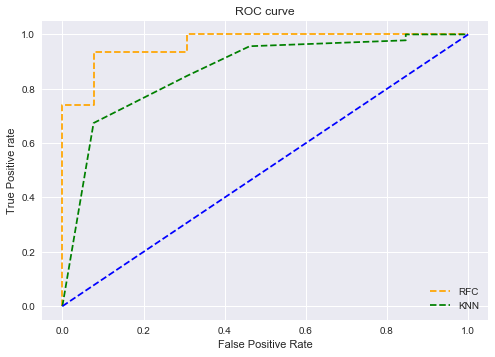

In [44]:

import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='RFC')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='KNN')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();